In [1]:
#https://www.kaggle.com/adityakadiwal/water-potability?select=water_potability.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
plt.style.use('ggplot')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(12,8)

In [3]:
water = pd.read_csv('water_potability.csv')

In [4]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
water.columns = [i.lower() for i in water.columns ]

In [6]:
water

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [7]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          2495 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3114 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
water.fillna(method='ffill', inplace=True)

In [9]:
water.fillna(method='bfill', inplace=True)

In [10]:
#water.sulfate.fillna(method='ffill', inplace=True)

In [11]:
water.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

In [14]:
X = water.drop('potability', axis=1)
y = water.potability

In [15]:
X.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,3.716080,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,368.516441,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,368.516441,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [16]:
X = water.drop('potability', axis=1)
y = water.potability

In [17]:
water.potability.value_counts()

0    1998
1    1278
Name: potability, dtype: int64

In [18]:
# draw equal number of samples from each potability category and rename file as pot_sample

pot_1 = water[water['potability']==1].sample(1200)
pot_0 = water[water['potability']==0].sample(1200)
pot_sample = pd.concat([pot_1,pot_0])
pot_sample.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
349,8.065339,174.120584,21366.28360,7.490944,315.180405,497.019234,11.417019,46.213198,3.756392,1
793,6.916826,210.860439,29263.55407,6.011611,252.231330,392.363586,12.892210,77.079780,4.598622,1
693,7.725192,213.951328,20461.75904,5.340319,376.012933,338.214258,17.032466,58.587459,4.163326,1
1557,7.580049,225.088554,31749.92440,5.884795,247.180038,503.908733,18.502406,78.354341,3.959637,1
2301,2.974429,181.562405,19289.36145,7.325055,393.168745,274.696540,14.093402,56.801321,2.619421,1


In [19]:
pot_sample.potability.value_counts()

1    1200
0    1200
Name: potability, dtype: int64

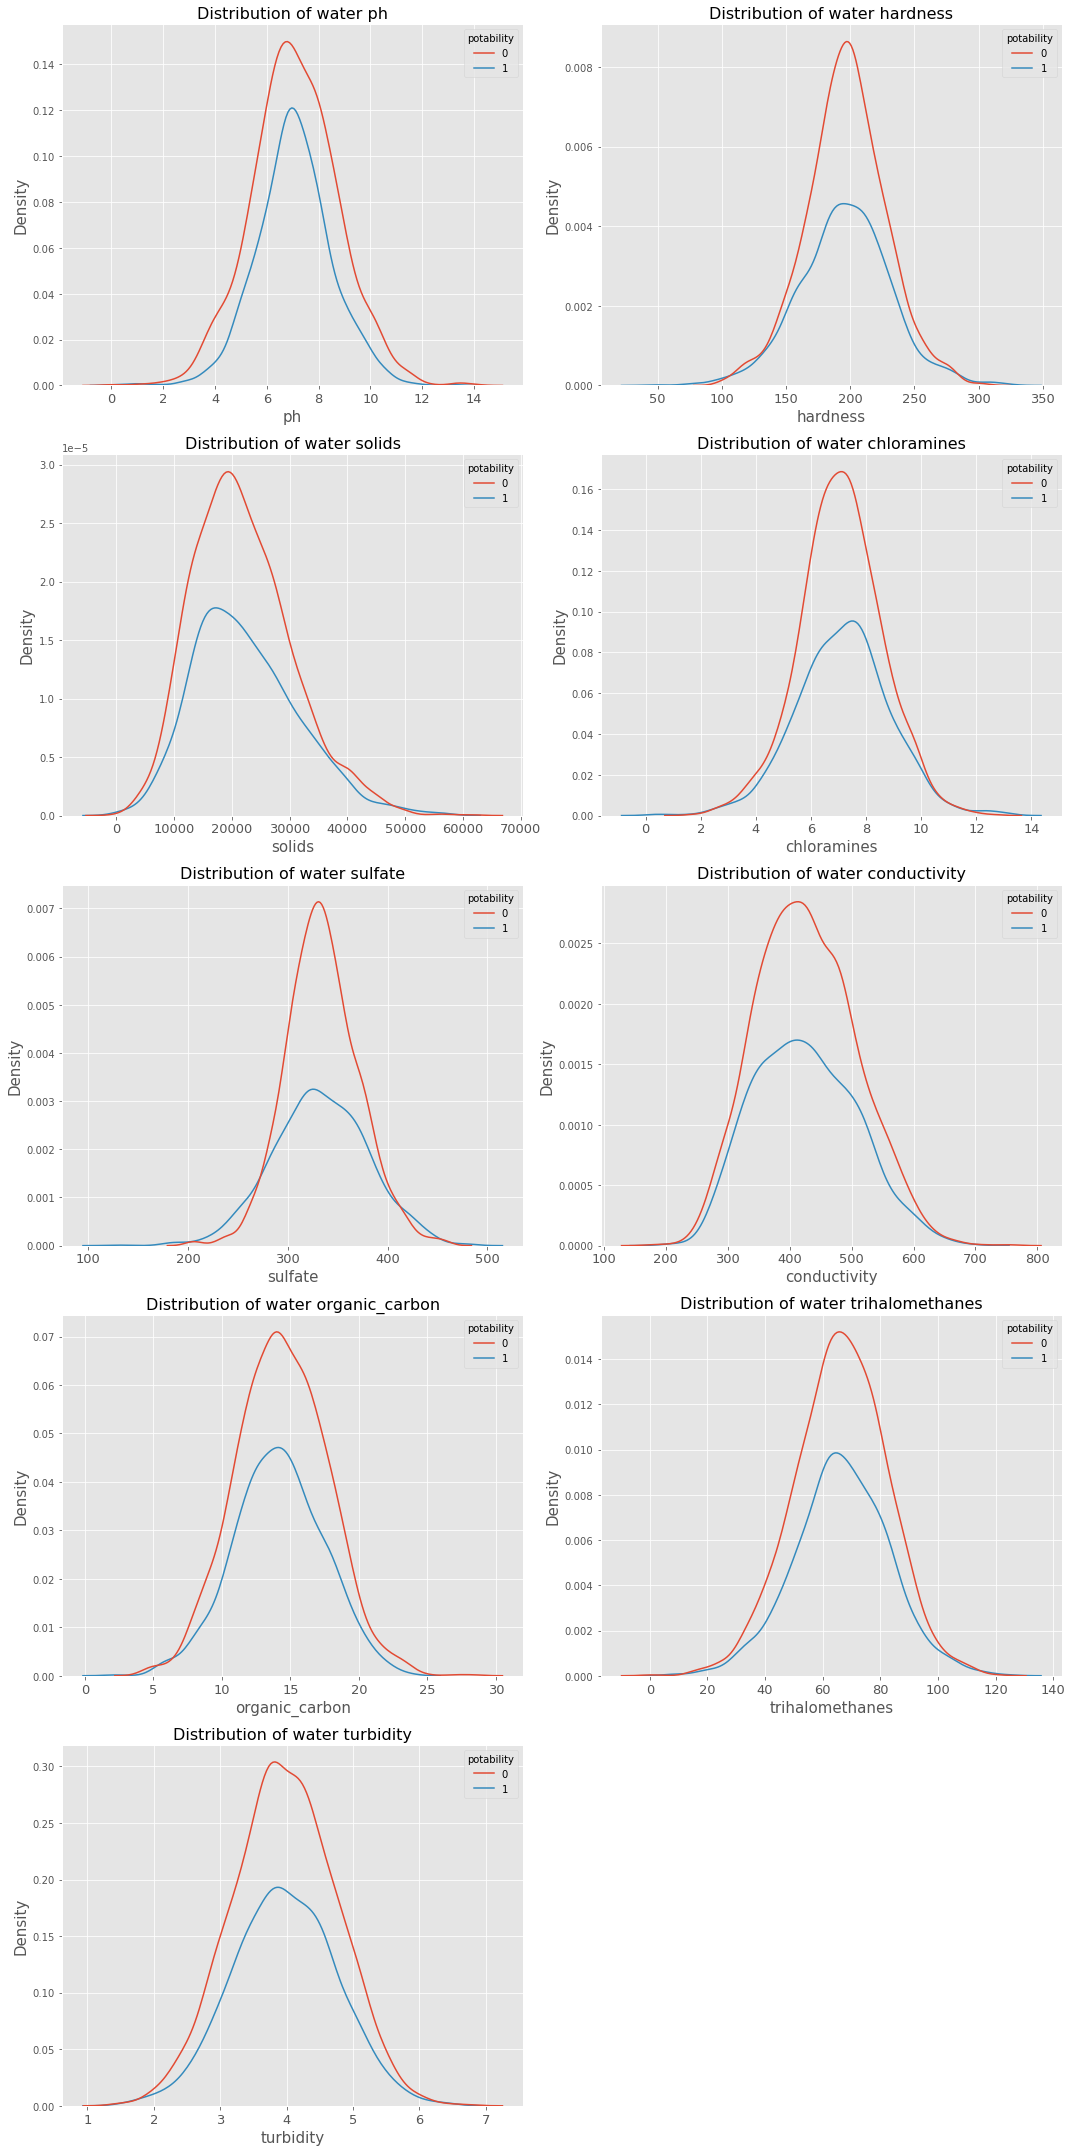

In [20]:
# plot graphs comparing distribution of various water propertise those which are potable and those which are not potable

fig=plt.gcf()
fig.set_size_inches(15,30)
h=1
for i in X.columns:
    plt.subplot(5,2,h)
    sns.kdeplot(data=water, x=i, hue='potability');
    plt.title(f"Distribution of water {i}", fontsize=16);
    plt.xticks(fontsize=13);
    plt.xlabel(f"{i}", fontsize=15);
    plt.ylabel('Density', fontsize=15);
    plt.tight_layout()
    h+=1

### Feature Selection

In [21]:
# import ExtraTreesClassifier and compute feature importance

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(X,y)
importance = clf.feature_importances_

### May I know which properties contribute most to the drinkability of water?

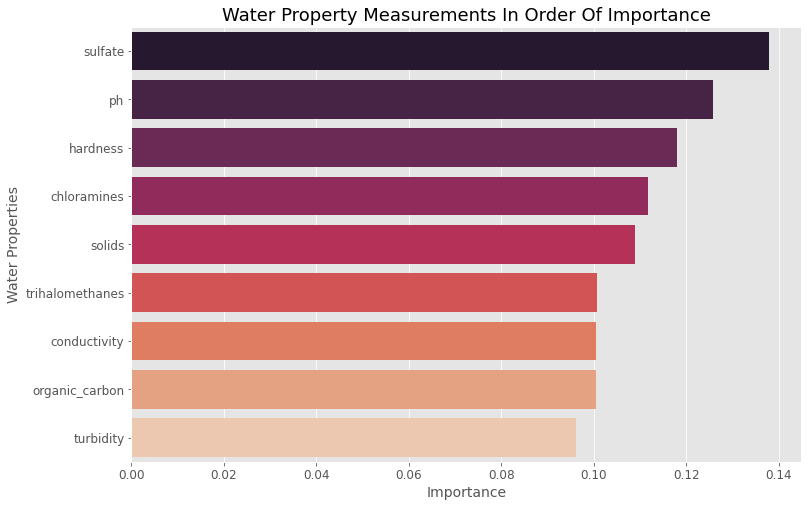

In [22]:
# visualise feature importances

add = []
for col, imp in zip(X.columns, importance):
    cast = {'features': col, 'feature_importance': imp}
    add.append(cast)
feature_importance = pd.DataFrame(data=add, columns=['features','feature_importance'])

order = feature_importance.sort_values('feature_importance', ascending=False).features
sns.barplot(data=feature_importance, x='feature_importance', y='features', order=order, palette='rocket')
plt.title('Water Property Measurements In Order Of Importance', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Water Properties', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
# draw equal number of samples from each potability category and rename file as pot_sample

pot_1 = water[water['potability']==1].sample(1200)
pot_0 = water[water['potability']==0].sample(1200)
pot_sample = pd.concat([pot_1,pot_0])

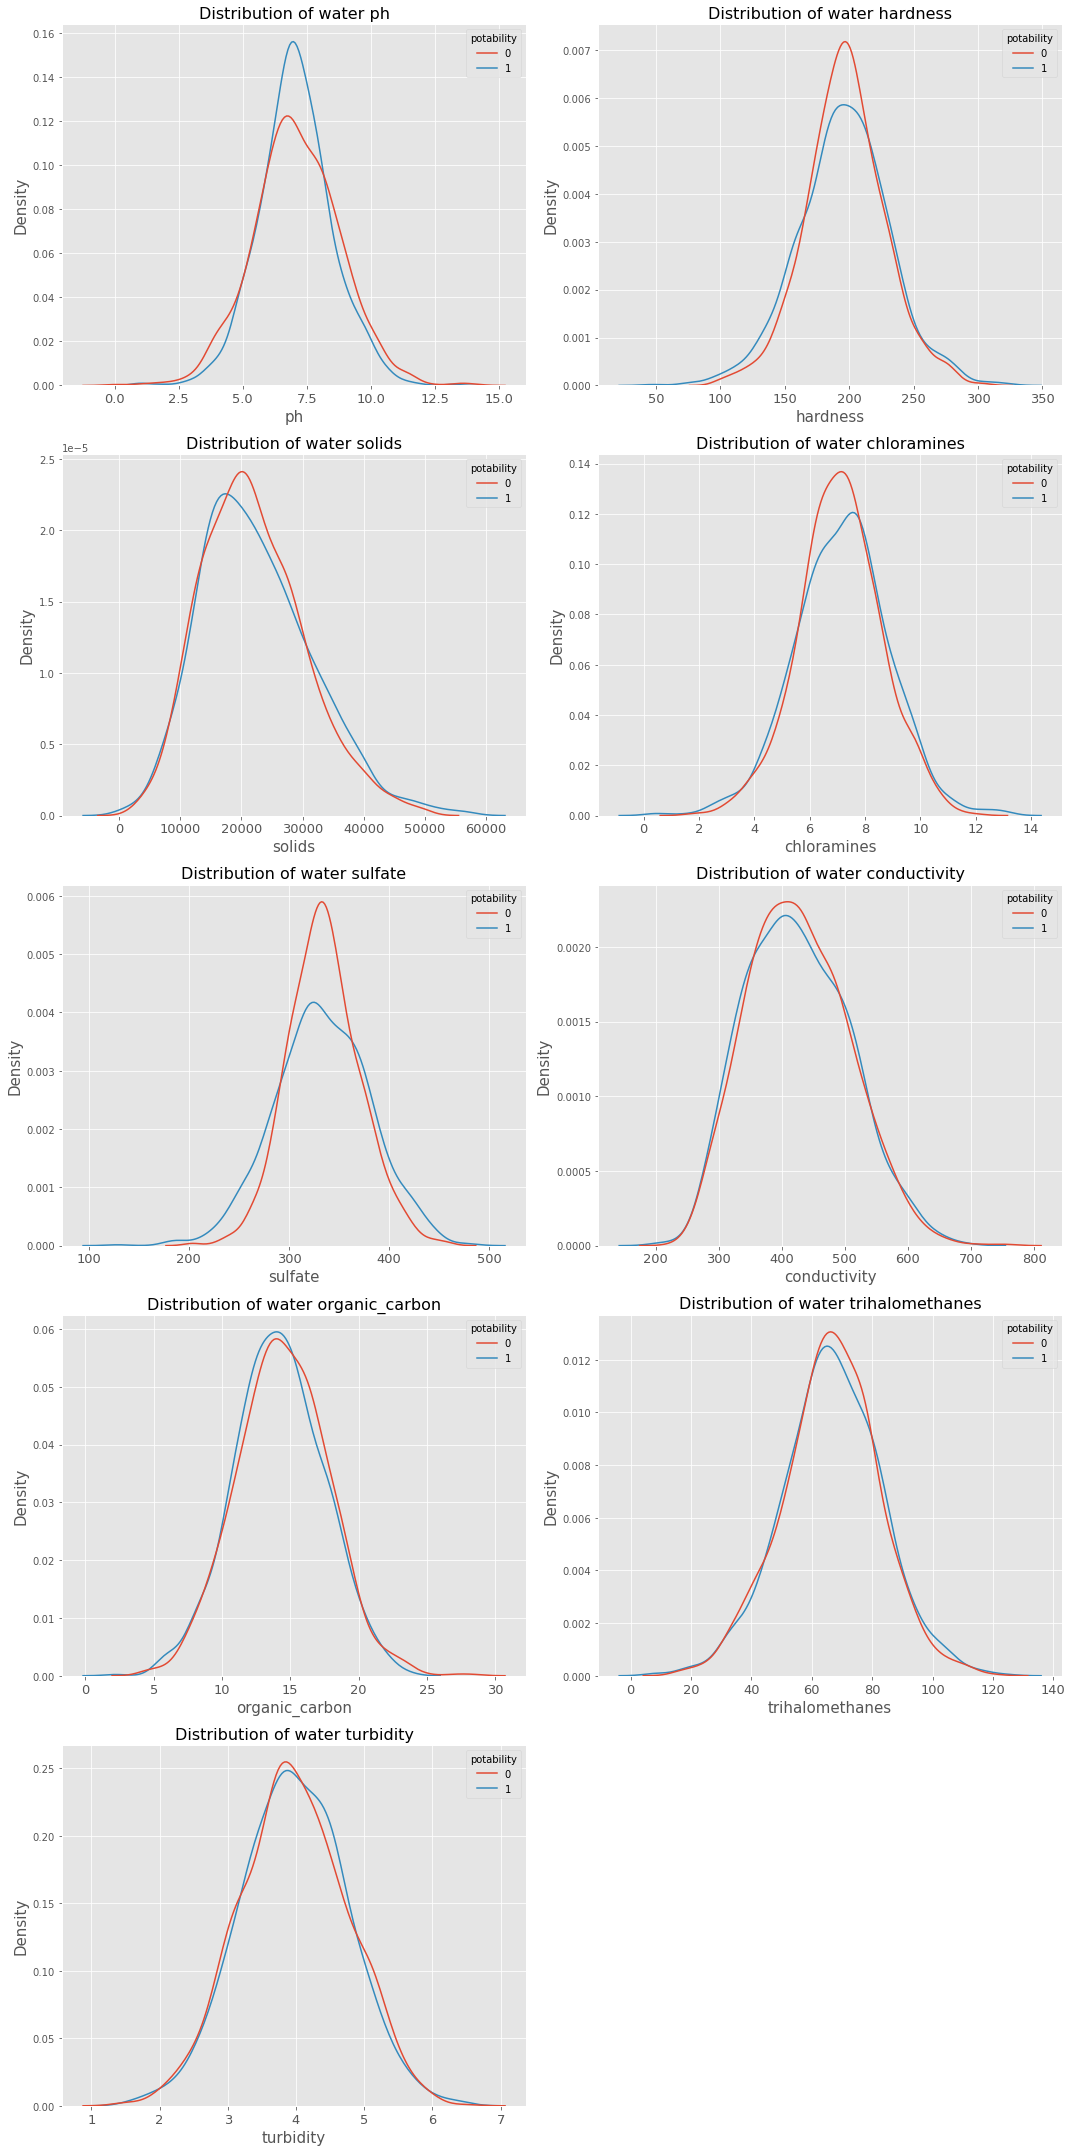

In [24]:
# plot graphs comparing distribution of various water propertise those which are potable and those which are not potable

fig=plt.gcf()
fig.set_size_inches(15,30)
h=1
for i in X.columns:
    plt.subplot(5,2,h)
    sns.kdeplot(data=pot_sample, x=i, hue='potability');
    plt.title(f"Distribution of water {i}", fontsize=16);
    plt.xticks(fontsize=13);
    plt.xlabel(f"{i}", fontsize=15);
    plt.ylabel('Density', fontsize=15);
    plt.tight_layout()
    h+=1

In [25]:
# selecting features

X = water[['ph','hardness','chloramines','sulfate']]

In [26]:
# use logistic regression for prediction

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X,y)
y_pred = lr.predict(X)
lr.score(X,y)

0.6098901098901099

In [27]:
# use lasso model for prediction

from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.1)
clf_lasso.fit(X,y)
clf_lasso.score(X,y)

0.0006398540073500047

In [28]:
# use KNearest Classifier for prediction

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
y_pred_knn = knn.predict(X)
water['predict_knn'] = y_pred_knn
print(f"The weight average score of prediction is {knn.score(X,y):.2f}")

The weight average score of prediction is 0.78


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
report=classification_report(y, y_pred_knn)
conf_mat=confusion_matrix(y, y_pred_knn)
conf_mat
# # Classification Accuracy - use float to perform true division, not integer division
# tp = conf_mat[0,0]
# tn = conf_mat[1,1]
# fp = conf_mat[0,1]
# fn = conf_mat[1,0]
# recall = round((tp) / (float(tp+fn)),2)
# recall

array([[1702,  296],
       [ 416,  862]], dtype=int64)

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      1998
           1       0.74      0.67      0.71      1278

    accuracy                           0.78      3276
   macro avg       0.77      0.76      0.77      3276
weighted avg       0.78      0.78      0.78      3276



### Can we do some prediction now?

In [31]:
sample = pd.read_csv('water_samples.csv')
sample.index = sample.index + 1

In [32]:
sample

,batch,production_date,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
1,batch_1,25/7/2021,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
2,batch_2,26/7/2021,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3,batch_3,27/7/2021,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [33]:
s1 = sample[['ph','hardness','chloramines','sulfate']]
knn.predict(s1)

array([0, 1, 0], dtype=int64)

### Can we visualize all the 4 properties and comparing between the 3 batches?

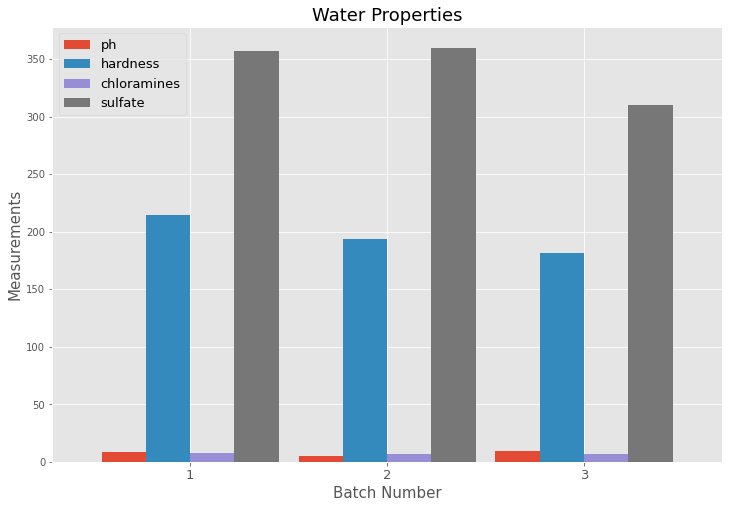

In [34]:
# visualise the properties comparing all 3 batches

s1.plot.bar(width=.9)
plt.xticks(rotation=0, fontsize=13)
plt.xlabel('Batch Number', fontsize=15)
plt.ylabel('Measurements', fontsize=15)
plt.title('Water Properties', fontsize=18)
plt.legend(loc='upper left', fontsize=13)
plt.show()

### What is the chance of getting correct the prediction of undrinkable water?

In [48]:
print('Classification report: \n',report)

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      1998
           1       0.74      0.67      0.71      1278

    accuracy                           0.78      3276
   macro avg       0.77      0.76      0.77      3276
weighted avg       0.78      0.78      0.78      3276

